# Data Description

Images can be downloaded here [[1](https://data.mendeley.com/datasets/rscbjbr9sj/2)] <br />
I manually moved some samples into a validation directory: 'val'. <br />
(This could be done why using train_test_split from scikit, but I wanted to keep the workflow simple).

1- Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification”, Mendeley Data, V2, doi: 10.17632/rscbjbr9sj.

In [3]:
import os
import numpy as np
import keras.utils as image
import matplotlib.pyplot as plt

In [4]:
data_path = './ChestXRay2017/chest_xray/'
train_normal = './ChestXRay2017/chest_xray/train/NORMAL'
train_pneumonia = './ChestXRay2017/chest_xray/train/PNEUMONIA'
val_normal = './ChestXRay2017/chest_xray/val/NORMAL'
val_pneumonia = './ChestXRay2017/chest_xray/val/PNEUMONIA'
test_normal = './ChestXRay2017/chest_xray/test/NORMAL'
test_pneumonia = './ChestXRay2017/chest_xray/test/PNEUMONIA'

In [5]:
# number of figures in each directory
print(f'Train Normal: {len(os.listdir(train_normal))}')
print(f'Train Pneumonia: {len(os.listdir(train_pneumonia))}')
print(f'Val Normal: {len(os.listdir(val_normal))}')
print(f'Val Pneumonia: {len(os.listdir(val_pneumonia))}')
print(f'Test Normal: {len(os.listdir(test_normal))}')
print(f'Test Pneumonia: {len(os.listdir(test_pneumonia))}')

Train Normal: 1299
Train Pneumonia: 3800
Val Normal: 50
Val Pneumonia: 84
Test Normal: 234
Test Pneumonia: 390


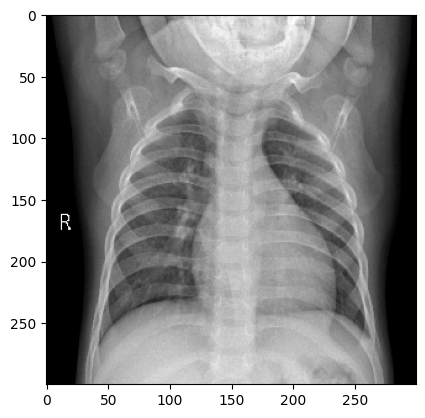

In [22]:
# healthy subject
im0 = os.listdir(train_normal)[0]
plt.imshow(image.load_img(os.path.join(train_normal, im0), target_size=(300,300)))

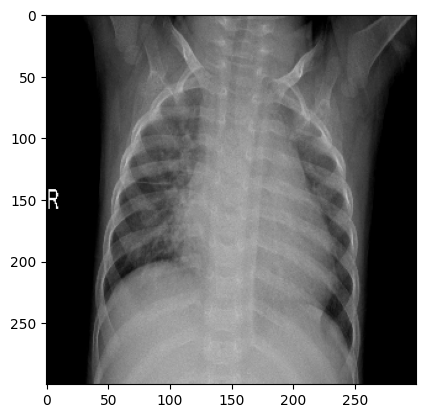

In [23]:
# Infected subject
im1 = os.listdir(train_pneumonia)[0]
plt.imshow(image.load_img(os.path.join(train_pneumonia, im1), target_size=(300,300)))

## Adquire Images

[This post](https://www.kaggle.com/code/rajpraveenpradhan/keras-based-cnn-model-for-pneumonia-detection) uses ImageDataGenerator to augment the data by increasing the number of data points. This is achieved by rotating, flipping, zooming in or out, changing light conditions, and cropping the images.

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(directory=os.path.join(data_path, 'train'), target_size=(300,300), batch_size=128, class_mode='binary')

Found 5098 images belonging to 2 classes.


In [8]:
val_datagen = ImageDataGenerator(rescale=1/255)
val_generator = val_datagen.flow_from_directory(directory=os.path.join(data_path, 'val'), target_size=(300,300), batch_size=128, class_mode='binary')

Found 134 images belonging to 2 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_generator = test_datagen.flow_from_directory(directory=os.path.join(data_path, 'test'), target_size=(300,300), batch_size=128, class_mode='binary')

Found 624 images belonging to 2 classes.


## Train/Test model

In [13]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(300, 300, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['accuracy'])
mc = ModelCheckpoint(filepath='./cnn.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)
# history = model.fit(train_generator, steps_per_epoch=10, epochs=10, validation_data=val_generator, callbacks=[mc])
history = model.fit(train_generator, steps_per_epoch=10, epochs=10, validation_data=val_generator)
model.save(f"./cnn.keras")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0

2024-02-29 07:39:58.202367: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138240000 exceeds 10% of free system memory.


Epoch 1/10


2024-02-29 07:40:06.620920: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 138240000 exceeds 10% of free system memory.
2024-02-29 07:40:06.737922: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1474560000 exceeds 10% of free system memory.
2024-02-29 07:40:08.608406: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 368640000 exceeds 10% of free system memory.
2024-02-29 07:40:08.928779: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 368640000 exceeds 10% of free system memory.


10/10 [==============================] - 117s 11s/step - loss: 0.7478 - accuracy: 0.6550 - val_loss: 0.7409 - val_accuracy: 0.6269
Epoch 2/10
10/10 [==============================] - 110s 11s/step - loss: 0.5272 - accuracy: 0.7617 - val_loss: 0.5063 - val_accuracy: 0.7463
Epoch 3/10
10/10 [==============================] - 106s 10s/step - loss: 0.4432 - accuracy: 0.8211 - val_loss: 0.5625 - val_accuracy: 0.6940
Epoch 4/10
10/10 [==============================] - 106s 11s/step - loss: 0.2806 - accuracy: 0.8736 - val_loss: 0.5798 - val_accuracy: 0.7090
Epoch 5/10
10/10 [==============================] - 107s 10s/step - loss: 0.2669 - accuracy: 0.8820 - val_loss: 0.5908 - val_accuracy: 0.7687
Epoch 6/10
10/10 [==============================] - 107s 10s/step - loss: 0.3706 - accuracy: 0.8438 - val_loss: 0.7372 - val_accuracy: 0.7090
Epoch 7/10
10/10 [==============================] - 107s 10s/step - loss: 0.2349 - accuracy: 0.9008 - val_loss: 0.5635 - val_accuracy: 0.7836
Epoch 8/10
10/10 

In [21]:
model.save("./cnn.keras")

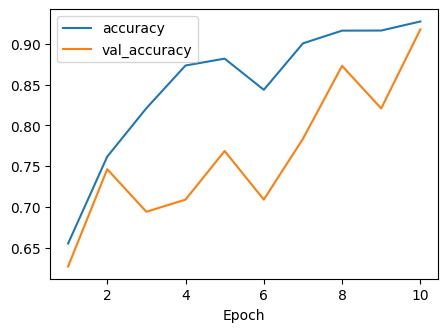

In [20]:
plt.figure(figsize=(5, 3.5))
plt.plot(range(1, 11), history.history['accuracy'], label='accuracy')
plt.plot(range(1, 11), history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.show()

## Testing the model and making predictions

In [1]:
from tensorflow.keras.models import load_model

In [10]:
model2 = load_model("./cnn.keras")
model2.evaluate(test_generator, steps=624)

2024-03-02 05:29:30.453091: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1474560000 exceeds 10% of free system memory.


  1/624 [..............................] - ETA: 1:22:36 - loss: 0.4390 - accuracy: 0.7891

2024-03-02 05:29:38.228642: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1474560000 exceeds 10% of free system memory.


  2/624 [..............................] - ETA: 1:08:21 - loss: 0.4636 - accuracy: 0.8242

2024-03-02 05:29:46.228514: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1474560000 exceeds 10% of free system memory.


  3/624 [..............................] - ETA: 1:15:12 - loss: 0.4767 - accuracy: 0.8255

2024-03-02 05:29:54.684141: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1474560000 exceeds 10% of free system memory.


  4/624 [..............................] - ETA: 1:19:35 - loss: 0.5361 - accuracy: 0.8125

2024-03-02 05:30:01.230061: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1290240000 exceeds 10% of free system memory.


624/624 [==============================] - 38s 48ms/step - loss: 0.5646 - accuracy: 0.8013


[0.5646283030509949, 0.8012820482254028]

In [17]:
# here let's use it with some images in test
def make_prediction(img_path):
    img = image.load_img(img_path, target_size=(300,300))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model2.predict(images, batch_size = 1)
    if classes[0] > 0.5:
        print(img_path + ' is pneumonia')
        plt.imshow(img)
    else:
        print(img_path + ' is normal')
        plt.imshow(img)

1/1 [==============================] - 0s 43ms/step
./ChestXRay2017/chest_xray/test/NORMAL/NORMAL2-IM-0337-0001.jpeg is normal


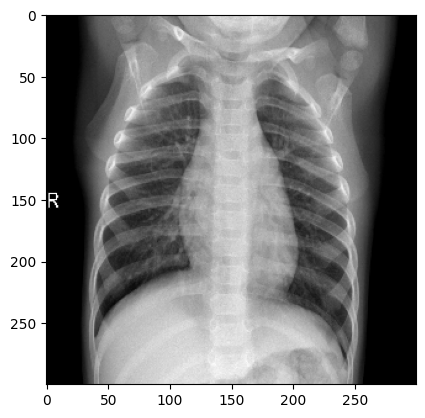

In [18]:
im0 = os.listdir(test_normal)[0]
img_path = os.path.join(test_normal, im0)
make_prediction(img_path)

1/1 [==============================] - 0s 47ms/step
./ChestXRay2017/chest_xray/test/PNEUMONIA/person111_bacteria_536.jpeg is pneumonia


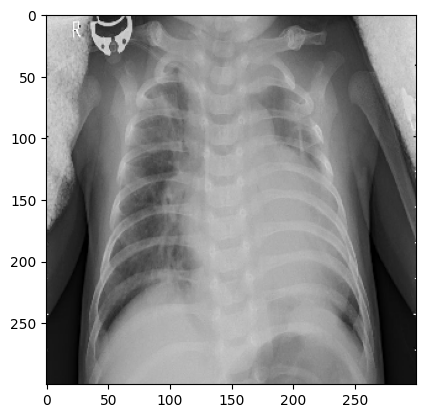

In [19]:
im0 = os.listdir(test_pneumonia)[0]
img_path = os.path.join(test_pneumonia, im0)
make_prediction(img_path)